# Netflix Data - Cleaning, Analysis and Visulization


[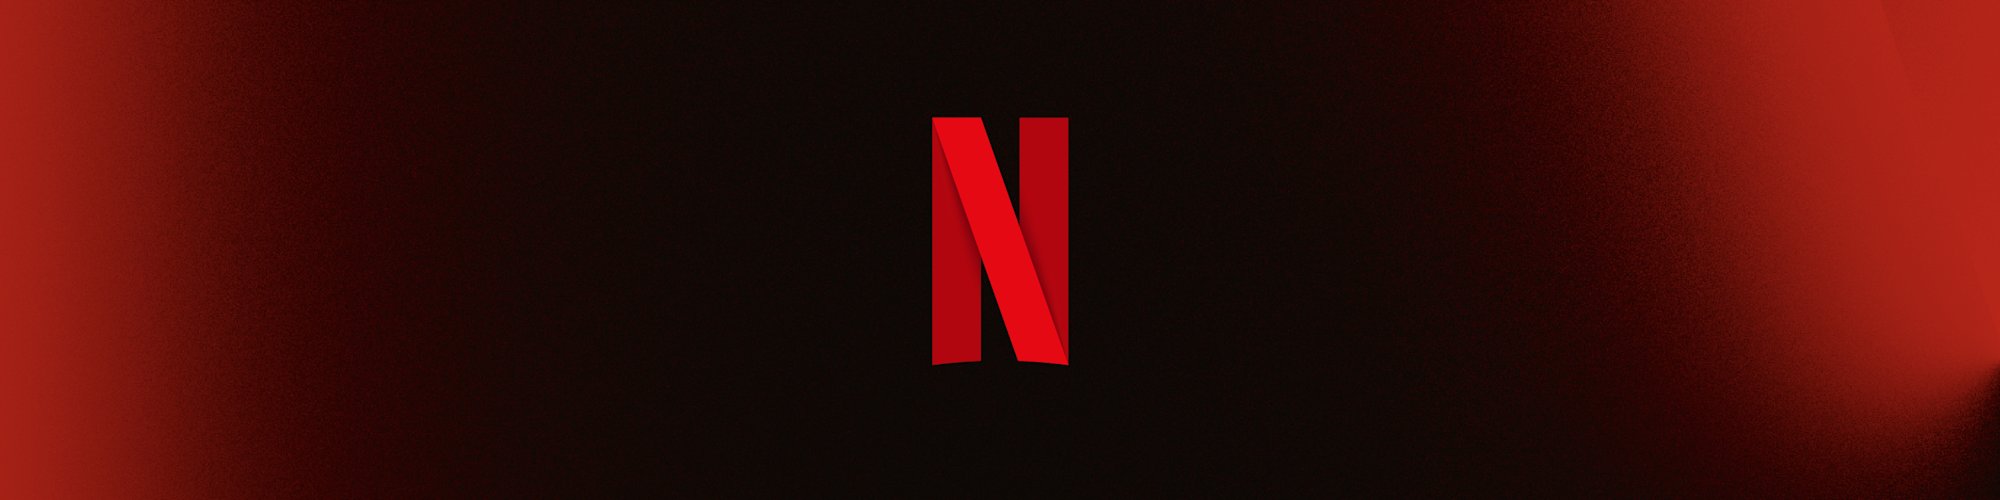](http://)
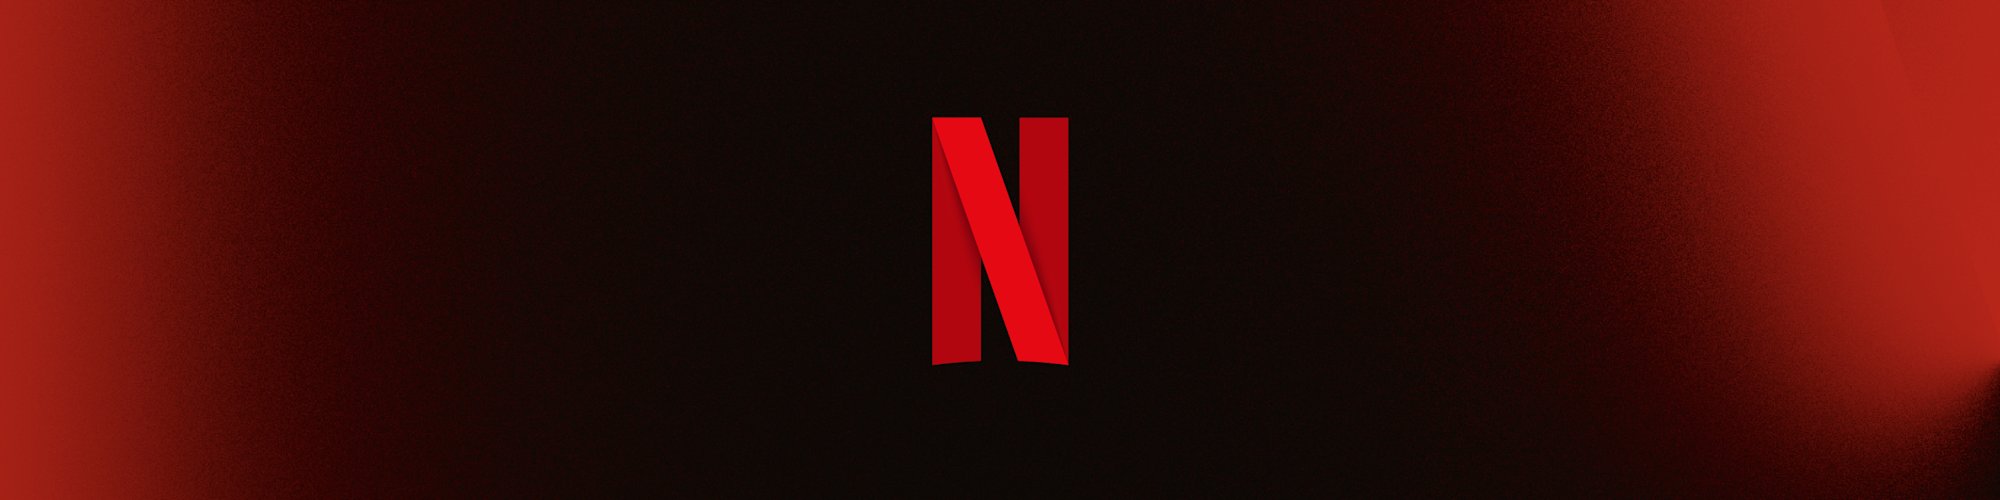
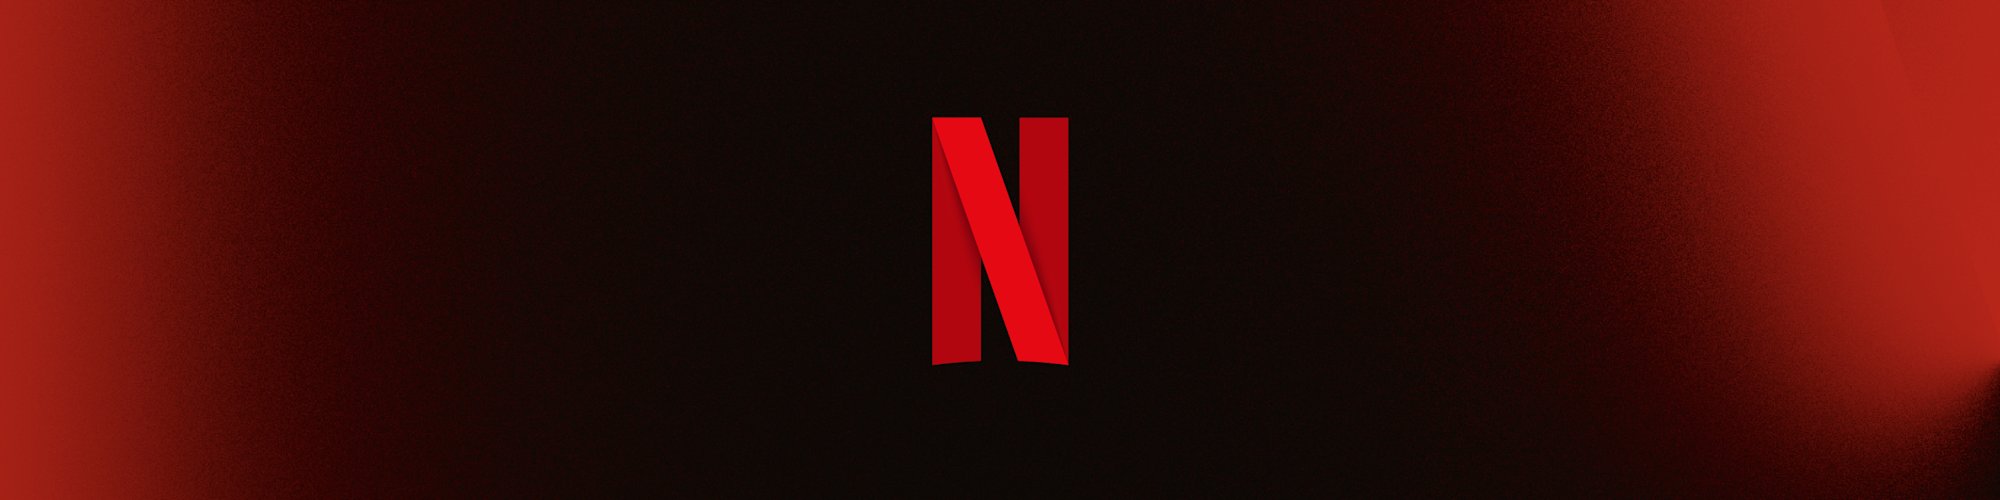

**Importing Libraries**

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from wordcloud import WordCloud

import warnings

warnings.filterwarnings('ignore')

**Load the Dataset**

In [2]:
# Check top rows
df = pd.read_csv('/kaggle/input/netflix-data-cleaning-analysis-and-visualization/netflix1.csv')
df.head()

show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dramas, TV Horror, TV Mysteries  
3                 Children & Family Movies, Comedies  
4   Dramas, Independent Movies, International Movies

In [3]:
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [4]:
# Statistical summary (numerical columns)
df.describe()

release_year
count   8790.000000
mean    2014.183163
std        8.825466
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

In [5]:
# Dataset shape (rows, columns)
df.shape

(8790, 10)

In [6]:
# List of column names
df.columns.tolist()

['show_id',
 'type',
 'title',
 'director',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in']

**Check for Null / Missing Values in the Data Set**

In [7]:
# Total missing values per column
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [8]:
# Checking for Duplicates
df.duplicated().any()

False

**Clean the Dataset**

In [9]:
# To print the column's
print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')


In [10]:
# Drop rows with any missing values
df.dropna(inplace=True)

In [11]:
# Check if any null values ecits at all
print("\n Any nulls?:", df.isnull().values.any())


 Any nulls?: False


In [12]:
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors = 'coerce')

In [13]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

# Exploratory Data Analysis (EDA)


**Distribution of Content Types (Movie vs TV Show)**

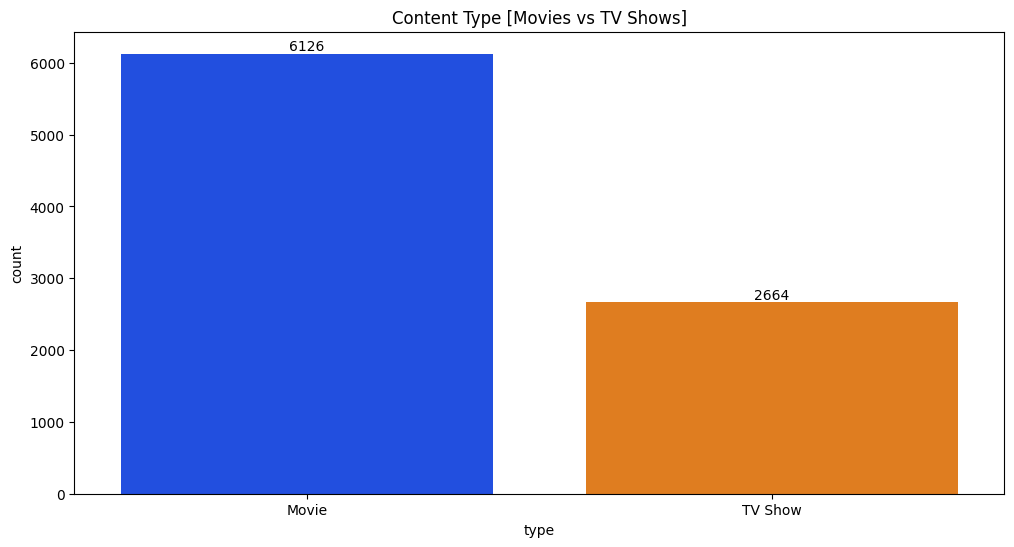

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize= (12,6))
ax = sns.countplot(data=df, x='type', palette='bright')
ax.bar_label(ax.containers[0])
plt.title('Content Type [Movies vs TV Shows]')
plt.show()

**Top 10 Countries Producing the Most Content**

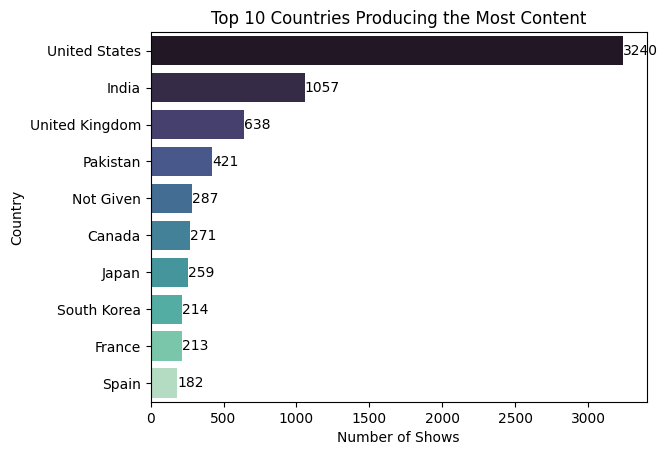

In [17]:
top_countries = df['country'].value_counts().head(10)
ax = sns.barplot(x= top_countries.values, y= top_countries.index, palette='mako' )
ax.bar_label(ax.containers[0])
plt.title('Top 10 Countries Producing the Most Content')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.show()

**Top Directors with the Most Content**

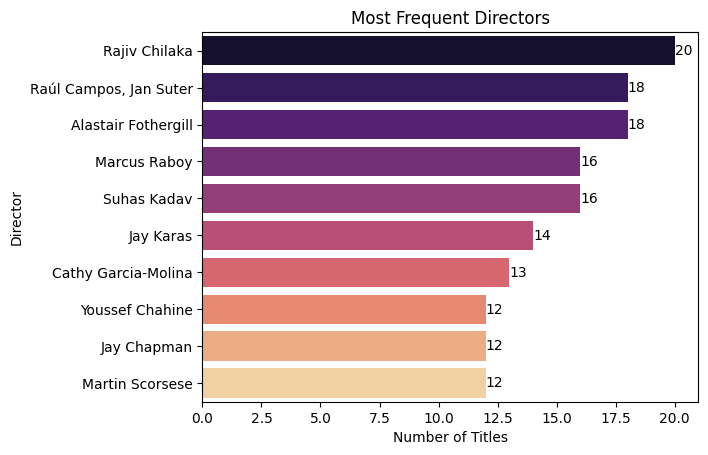

In [18]:
top_directors= df[df['director'] != 'Not Given']['director'].value_counts().head(10)
ax= sns.barplot(x= top_directors.values, y= top_directors.index, palette = 'magma')
ax.bar_label(ax.containers[0])
plt.title('Most Frequent Directors')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

**TV Shows by Season Duration**

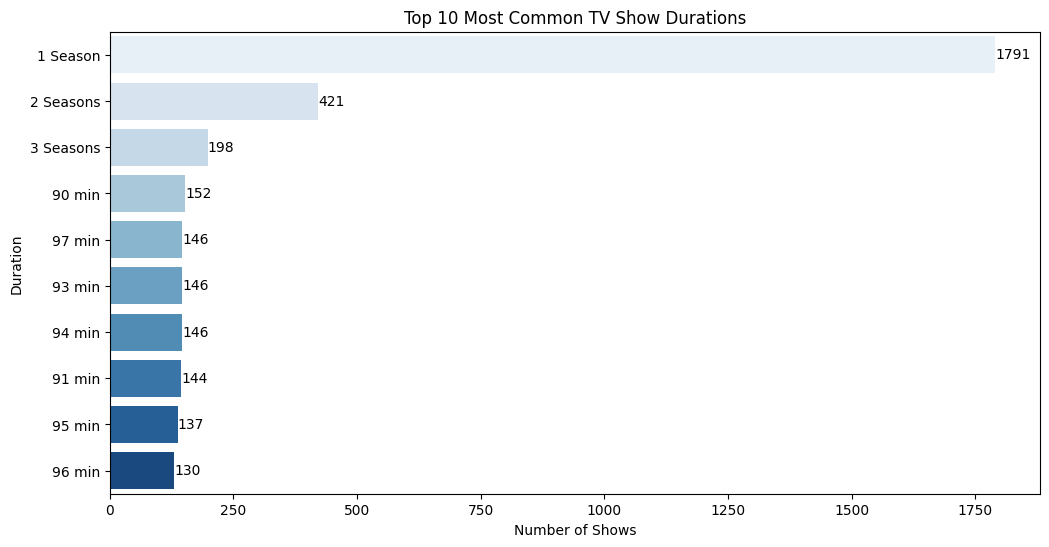

In [39]:
top_durations = df['duration'].value_counts().head(10)
plt.figure(figsize = (12,6))
ax = sns.barplot(x= top_durations.values, y= top_durations.index, palette= 'Blues')
ax.bar_label(ax.containers[0])
plt.title('Top 10 Most Common TV Show Durations')
plt.xlabel('Number of Shows')
plt.ylabel('Duration')
plt.show()

**Movie Duration vs Release Year**

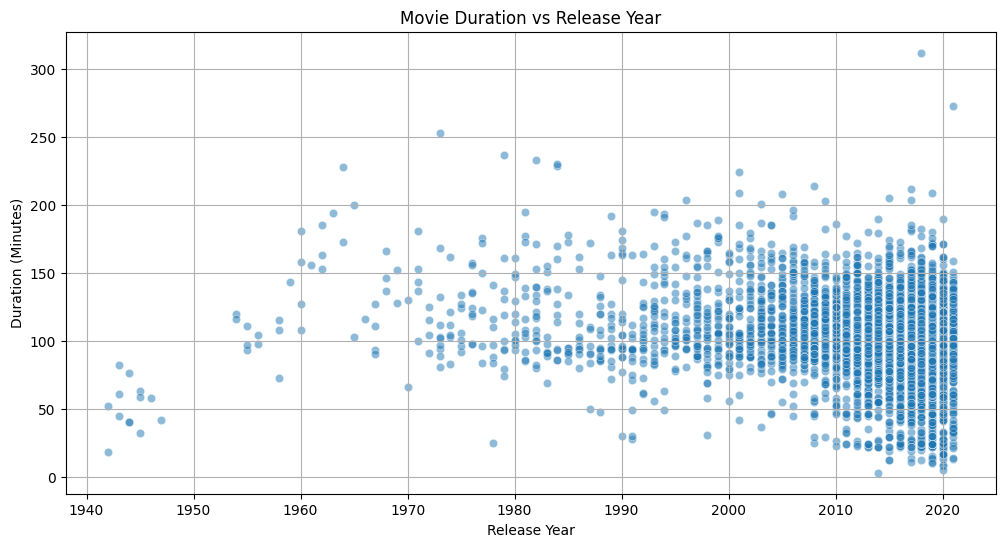

In [71]:
movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_min'] = movie_df ['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize= (12,6))
sns.scatterplot(data= movie_df, x= 'release_year', y= 'duration_min', alpha = 0.5,)
plt.title('Movie Duration vs Release Year')
plt.xlabel('Release Year')
plt.ylabel('Duration (Minutes)')
plt.grid(True)
plt.show()

**Content Added Over Time (Month vs Year)**

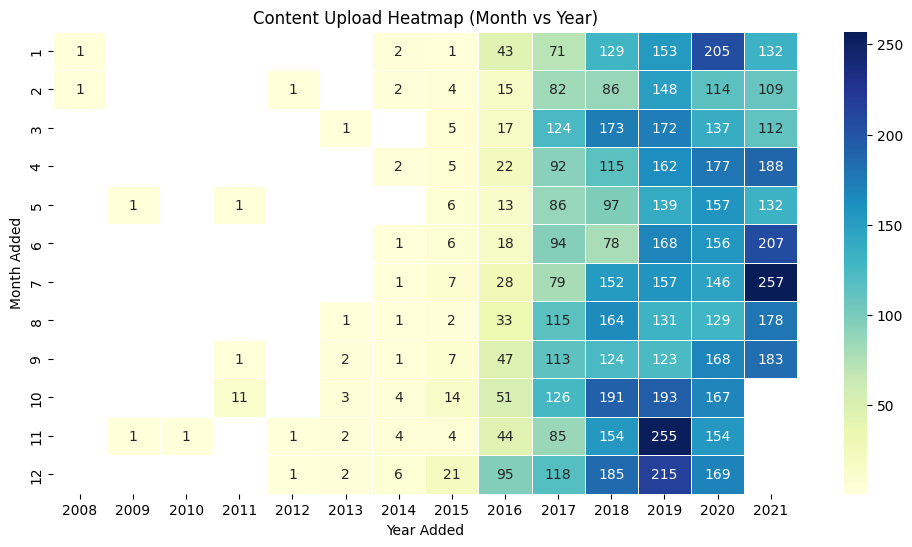

In [73]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

# Create a pivot table
pivot = df.pivot_table(index='month_added', columns='year_added', values='show_id', aggfunc='count')

# Plot
import seaborn as sns

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap='YlGnBu', linewidths=0.5, annot=True, fmt=".0f")
plt.title("Content Upload Heatmap (Month vs Year)")
plt.xlabel("Year Added")
plt.ylabel("Month Added")
plt.show()

**Genre Word Cloud**

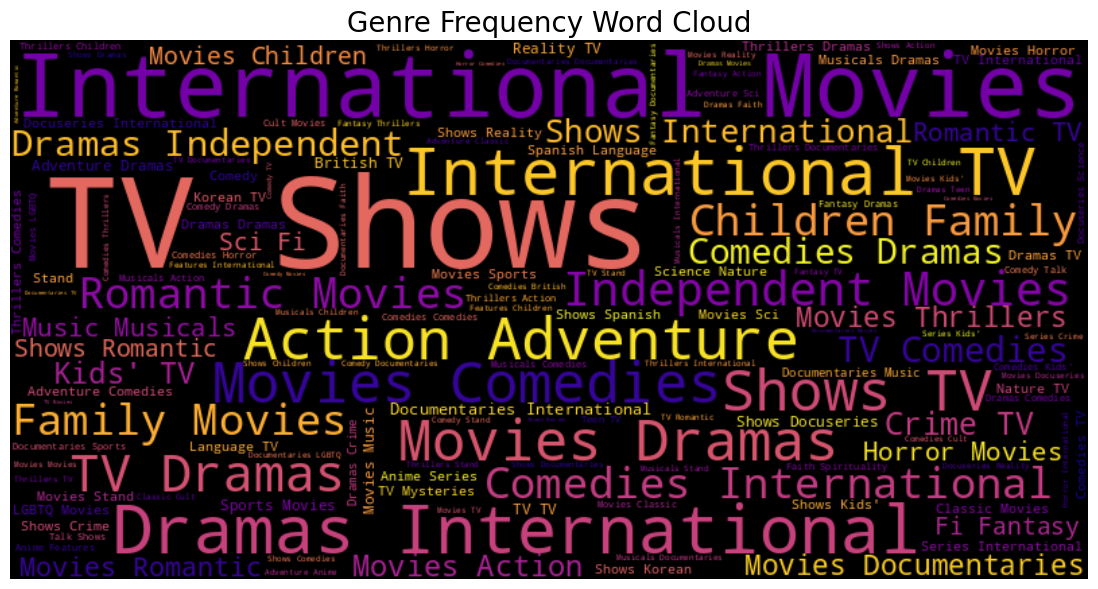

In [77]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

genres = ','.join(df['listed_in'].dropna().values)
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='plasma').generate(genres)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genre Frequency Word Cloud', fontsize=20)
plt.show()


**Total Content Released Each Year**

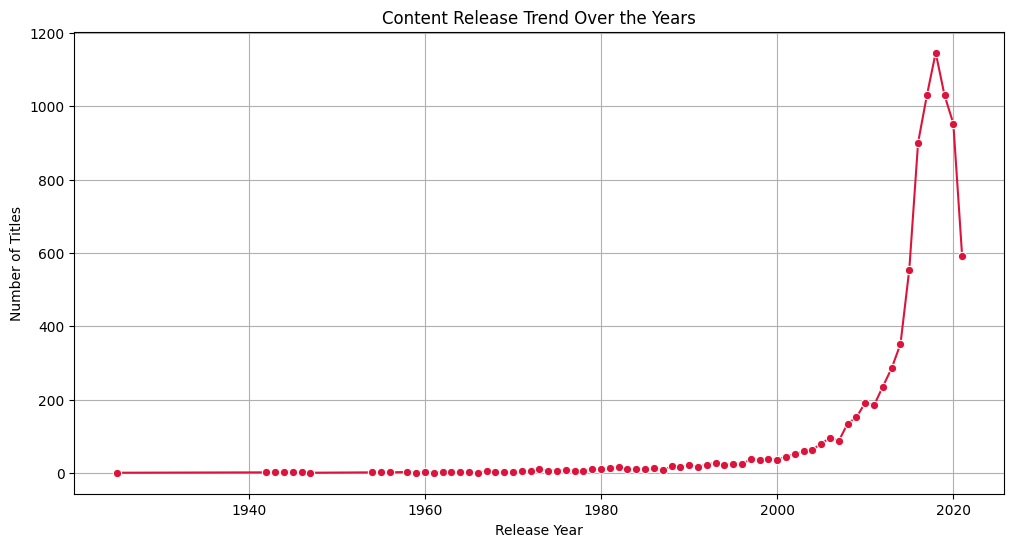

In [81]:
yearly_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o', color='crimson')
plt.title('Content Release Trend Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

**Summary of Insights**

*- Most content on the platform is Movies (~70%).*

*- TV-MA and TV-14 are the most common ratings.*

*- United States has the most content, followed by India.*

*- Movie durations are mostly between 80 to 120 minutes.*

*- Newer content (post-2015) is added much more frequently.*

**Conclusion**

*This analysis helped us understand the content trends on Netflix over the years. It showed us which countries dominate, how content types vary, and how durations change over time. This insight can help content creators or marketers better understand the platform.*